In [4]:
push!(LOAD_PATH, "..")
using ASE
using PyPlot
using PyCall

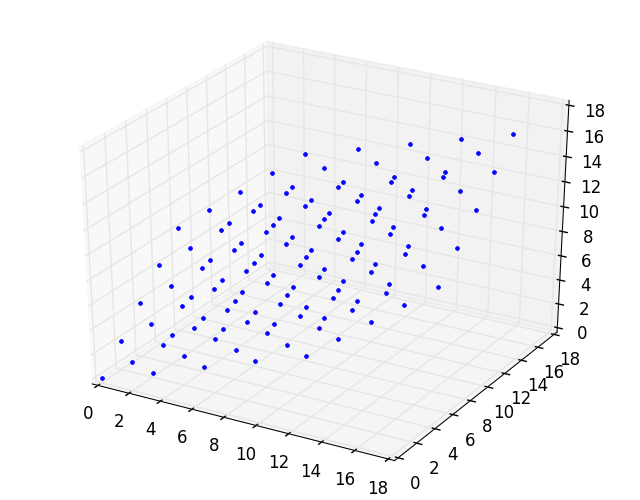

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x31a2285d0>

In [5]:
at = bulk("Al")
at = repeat(at, (5, 5, 5))
X = get_positions(at)
plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")

In [8]:
nlist = ASENeighborList(at, 1.5; self_interaction=false, bothways=true)


ASE.ASENeighborList(PyObject <ase.calculators.neighborlist.NeighborList instance at 0x31a465ea8>)

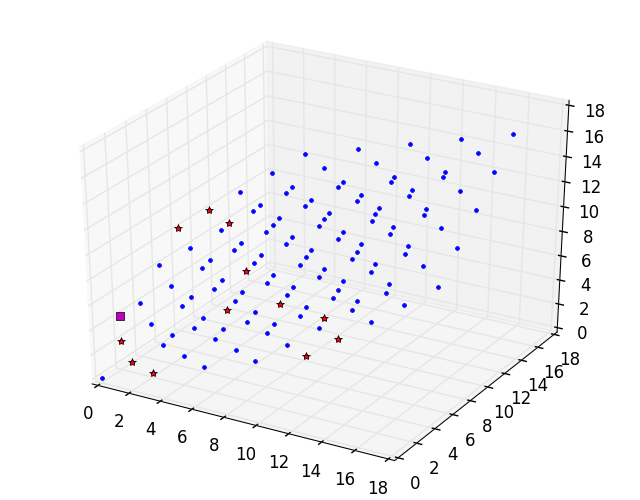

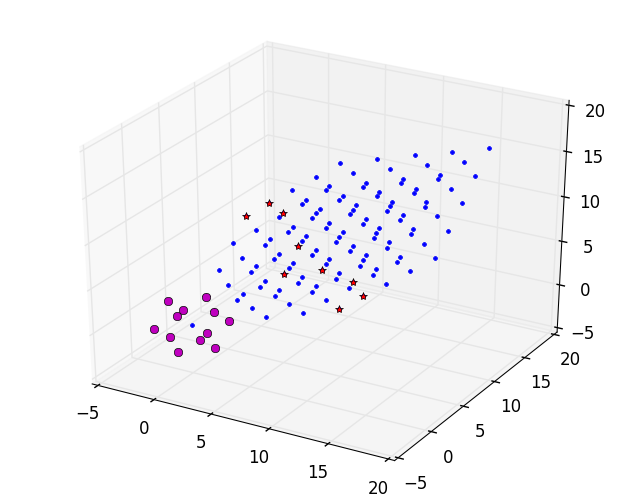

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x31af88d10>

In [9]:

figure(1)
I, _ = get_neighbors(1, nlist)
plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
plot3D(X[1,I][:], X[2,I][:], X[3,I][:], "r*")
plot3D([X[1,1];], [X[1,2];], [X[1,3];], "ms")

figure(2)
I, _, r = neighbors(1, nlist, at)
plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
plot3D(X[1,I][:], X[2,I][:], X[3,I][:], "r*")
r .+= X[:,1]
plot3D(slice(r, 1,:), slice(r,2,:), slice(r,3,:), "mo")



In [1]:
push!(LOAD_PATH, "..")
using ASE
using ProfileView

function loop_neigs(at, nlist)
    for n = 1:length(at)
        I, s, r = neighbors(n, nlist, at)
    end
end

at = bulk("Al")
at = repeat(at, (8, 8, 8))
nlist = ASENeighborList(at, 1.5; self_interaction=false, bothways=true)


@time loop_neigs(at, nlist)
@time loop_neigs(at, nlist)




  4.834886 seconds (5.90 M allocations: 353.898 MB, 1.82% gc time)
  0.996470 seconds (248.86 k allocations: 12.227 MB)


In [2]:
Profile.clear()
@profile loop_neigs(at, nlist)


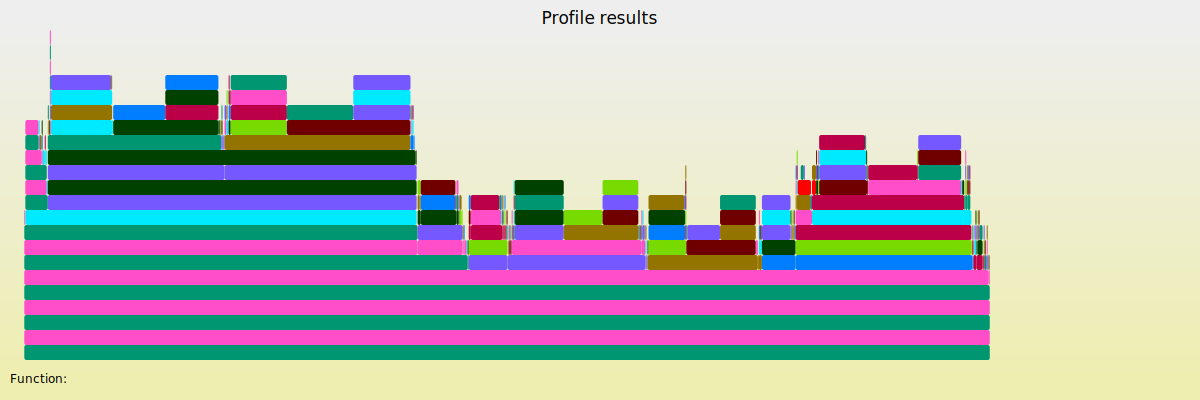

In [3]:
ProfileView.view()